In [ ]:
!git clone https://github.com/Kasra1377/mask-detection.git

Cloning into 'face-mask-dataset'...
remote: Enumerating objects: 1670, done.
remote: Counting objects: 100% (1670/1670), done.
remote: Compressing objects: 100% (1669/1669), done.
remote: Total 1670 (delta 3), reused 1652 (delta 0), pack-reused 0
Receiving objects: 100% (1670/1670), 57.68 MiB | 25.56 MiB/s, done.
Resolving deltas: 100% (3/3), done.


### Importing Libraries and General Overview

In This section we are going to import all essential libraries for our mask detection project such as `Tensorflow` , `Keras` , `Matplotlib` , ... and then loading and preprocessing the dataset.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imutils import paths
import pandas as pd
import numpy as np
import os
import cv2
from PIL import Image

In [ ]:
print(tensorflow.__version__)
print(sklearn.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(imutils.__version__)
print(tensorflow.__version__)
print(tensorflow.__version__)

NameError: ignored

In the next step the images' path has to be defined and then we have to put the paths into a list.

In [ ]:
path = "/content/face-mask-dataset/mask_dataset"
imagePaths = list(paths.list_images(path)) 

Printing first five paths to ensure that the paths are read correctly.

In [ ]:
imagePaths[:5]

['/content/face-mask-dataset/mask_dataset/without_mask/0_0_jiayuanyuan_0130.jpg',
 '/content/face-mask-dataset/mask_dataset/without_mask/1_0_aidai_0050.jpg',
 '/content/face-mask-dataset/mask_dataset/without_mask/1_0_anhu_0164.jpg',
 '/content/face-mask-dataset/mask_dataset/without_mask/0_0_xiaozhan_0003.jpg',
 '/content/face-mask-dataset/mask_dataset/without_mask/0_0_cengyongti_0063.jpg']

We defined two lists, the first one is called `data` and the second one is called `labels`. We created a "for loop" that iterates through `imagePaths` variable. The paths are splitted by `/` and the second lasts are appended to the `labels`. Then we load the images by the size of `224x224`(which is a common size for feeding a pretrained model) Then we convert PIL images into array, preprocess them and then append it to the `data` list.

In [ ]:
data = []
labels = []
for i in imagePaths:
  label = i.split(os.path.sep)[-2]
  labels.append(label)
  image = load_img(i , target_size = (224 , 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  data.append(image)

Converting both lists into numpy array.

In [ ]:
data = np.array(data , dtype = "float32")
labels = np.array(labels)

In [ ]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In the next step our purpose is plotting the count of each label. So to do this we defined a function that takes the array which contains the labels of our data.Then change it into a pandas series data type , counts its value and then pass the counts and the names of the label into barplot.

In [ ]:
def plotBarchart(array , figsize = (7 , 7)):
  labels_series = pd.Series(labels)
  ds = labels_series.value_counts().reset_index()      
  ds.columns = ["Name" , "Count"]
  ds["Name"] = ds["Name"].astype("object")

  fig , ax = plt.subplots(figsize = figsize)
  ax = sns.barplot(x = "Name" , y = "Count" , data = ds)
  plt.grid(False)

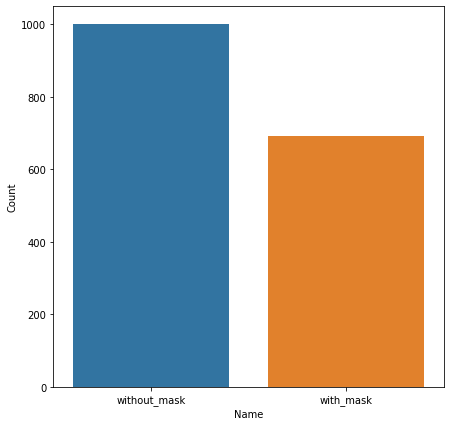

In [ ]:
plotBarchart(labels)

* As we can see, we have ~1600 images in total which ~1000 of them are `without_ mask` and ~600 of them are `with_mask`.

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

After label binarization, we have to split our data into `training set` and `test set` with `stratification` which means that each of the test set and trainig set contains the same propotion of class labels as the input dataset.

In [ ]:
X_train ,  X_test , y_train , y_test = train_test_split(data , labels , test_size = .3 , random_state = 1 , stratify = labels)

In [ ]:
print("X_train shape : " , X_train.shape)
print("y_train shape : " , y_train.shape)
print("X_test shape : " , X_test.shape)
print("y_test shape : " , y_test.shape)

X_train shape :  (1183, 224, 224, 3)
y_train shape :  (1183, 2)
X_test shape :  (508, 224, 224, 3)
y_test shape :  (508, 2)


In the next step we defined a function that plot 9 random images of the dataset

In [ ]:
def plotSamples(data , figsize = (10 , 10) , wspace = 0.1  , hspace = 0.3 ):
  plt.rcParams["axes.grid"] = True
  plt.rcParams["axes.edgecolor"] = "0.15"                      # selecting edge/border color for each image 
  plt.rcParams["axes.linewidth"]  = 1.25                       # assining a edge/border width for each image
  fig , axes = plt.subplots(3 , 3 , figsize = figsize)      
  plt.subplots_adjust(wspace = wspace  , hspace = hspace)             # determining the width gap and height gap between each subplots

  axes = axes.flatten()                                        # for using axes indeces with one dimention array instead of two dimension

  for i in range(0 , 9):    
    n = np.random.choice(np.arange(0 , len(data) , 1))
    img = np.reshape(data[n], (224 , 224 , 3))                    # converting a 1-D array into 2-D 224x224 array
    axes[i].imshow(img)
    axes[i].tick_params(labelbottom = False , labelleft = False)    # removing labels/ticks along x axis and y axis
    axes[i].grid(False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


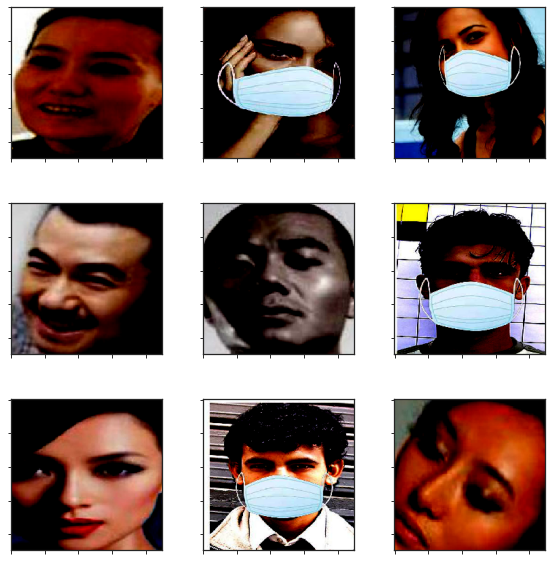

In [ ]:
plotSamples(data)

And then defining the class name for each label...

In [ ]:
label_dict = {0 : "Mask" , 1 : "Without Mask"}

### Data Augmentation and Model Building

One of the ways to avoid model overfitting and neural network regularization is `Data Augmentation` which with this `generator` we are able to increase the generalizability of the model. To do this replace the training data with randomly transfomed images.The whole process of image augmentation is shown below:

![alt text](https://pyimagesearch.com/wp-content/uploads/2019/07/keras_data_augmentation_in_place.png "Image Augmentation Procedure")


[(Image Source)](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/)

With this data augmetation we can ensure that our neural network sees new images that has never seen before in each epoch. So with this technique we regularize the model, **sacrificing the training accuracy to improve the validation performance**. It is worth mentioning that transformed and augmented images will be discarded after the training process.

In [ ]:
aug = ImageDataGenerator(rotation_range = 20,
                         zoom_range = 0.15,
                         width_shift_range = 0.2,
                         shear_range = 0.15,
                         horizontal_flip = True,
                         vertical_flip = True, 
                         fill_mode = "nearest"
                        )

* In the next step we have to use the one of the most popular pre-trained model which is `MobileNetV2`. So we define the base model which is this specific pre-trained model. We passed the `imagenet` string to `weights` argument because we want to pre-train on `imageNet`. We set `include-top` to False, because we want to create our own fully-connected (`Dense`) layer. And at the end we set the `input_tensor` with the shape of `224x224x3` (input image shape).

In [ ]:
baseModel = MobileNetV2(weights = "imagenet" , include_top = False , input_tensor = Input(shape = (224 , 224 , 3)))

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

As we can see, the model does not have the FC layers.Lets defining these layers by ourselves.

In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size = (7 , 7))(headModel)
headModel = Flatten(name = "Flatten")(headModel)
headModel = Dense(128 , activation = "relu")(headModel)
headModel = Dropout(rate = 0.1)(headModel)
headModel = Dense(2 , activation = "softmax")(headModel)

model = Model(inputs = baseModel.input  , outputs = headModel)

And freezing the all layers of the pre-trained model

In [ ]:
for layer in baseModel.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
LEARNING_RATE = 0.0001
EPOCHS = 20
BS = 28
OPT = Adam(lr = LEARNING_RATE , decay = LEARNING_RATE / EPOCHS)

After we froze pre-trained model layers, we have to train this model on our dataset. Note that we have to pass the augmented data as training data.
* **Note:**Keep in mind that we should only apply data augmentation on training set.We should not apply data augmentation on test set.

In [ ]:
model.compile(loss = "binary_crossentropy" , optimizer = OPT , metrics = ["accuracy"])
r = model.fit(
    aug.flow(X_train , y_train , batch_size = BS),
    steps_per_epoch = len(X_train) // BS,
    validation_data = (X_test , y_test),
    validation_steps = len(X_test) // BS,
    epochs = EPOCHS
)

Epoch 1/20
42/42 [==============================] - 48s 337ms/step - loss: 0.5500 - accuracy: 0.7124 - val_loss: 0.1818 - val_accuracy: 0.9764
Epoch 2/20
42/42 [==============================] - 12s 289ms/step - loss: 0.1644 - accuracy: 0.9678 - val_loss: 0.0906 - val_accuracy: 0.9843
Epoch 3/20
42/42 [==============================] - 12s 290ms/step - loss: 0.0901 - accuracy: 0.9859 - val_loss: 0.0655 - val_accuracy: 0.9843
Epoch 4/20
42/42 [==============================] - 12s 286ms/step - loss: 0.0710 - accuracy: 0.9834 - val_loss: 0.0506 - val_accuracy: 0.9921
Epoch 5/20
42/42 [==============================] - 12s 289ms/step - loss: 0.0495 - accuracy: 0.9935 - val_loss: 0.0417 - val_accuracy: 0.9882
Epoch 6/20
42/42 [==============================] - 12s 287ms/step - loss: 0.0557 - accuracy: 0.9892 - val_loss: 0.0362 - val_accuracy: 0.9921
Epoch 7/20
42/42 [==============================] - 12s 286ms/step - loss: 0.0438 - accuracy: 0.9922 - val_loss: 0.0326 - val_accuracy: 0.9941

### Model Evaluation
After training the model we have to evaluate it. In the first step we have to plot training accuracy and validation accuracy.

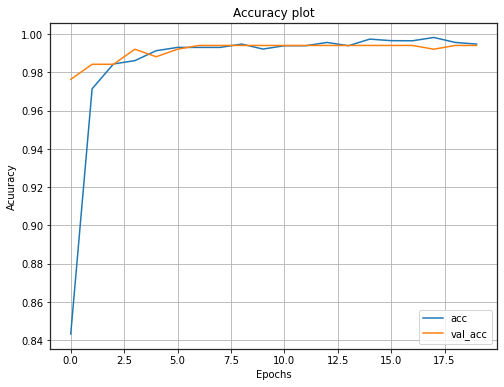

In [ ]:
fig , ax1  = plt.subplots(figsize = (8 , 6))
ax1.plot(r.history["accuracy"] , label = "acc")
ax1.plot(r.history["val_accuracy"] , label = "val_acc")
ax1.set_title("Accuracy plot")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Acuuracy")
ax1.grid(True)
ax1.legend()

And then we have to plot the validation and accuracy loss. One of the of the important things we have to note that is that our validation loss is lower than our training loss which most at the times **is not a problem** .But this phenomenon happens by several reasons.
1. The regularization is only applied on the training set. With regularization(e.g. `Data Augmetation`) we somehow sacrifice the training data to get a better result for the test set performance.
2. The validation set may be easier than the training set.
3. Data Leakage (This phenomenon makes some serious problems in furthure developement)
4. Training loss is measured during each epoch while validation loss is measured after each epoch. To solve this problem, we have to shift the training loss plot by `0.5` to the left.
[(Image Source)](https://www.pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/)

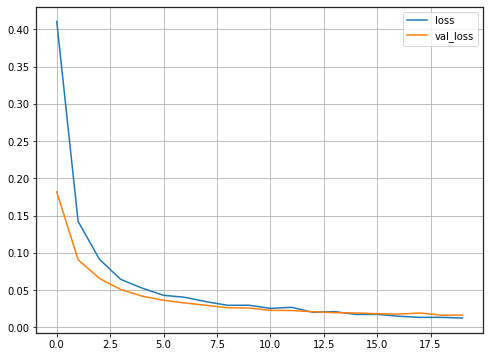

In [ ]:
fig , ax2  = plt.subplots(figsize = (8 , 6))

ax2.plot(r.history["loss"] , label = "loss")
ax2.plot(r.history["val_loss"] , label = "val_loss")
ax1.set_title("Loss plot")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("loss")
ax2.grid(True)
ax2.legend()

In [ ]:
epochs = list(range(EPOCHS))
shifted_epoch = [x - 0.5 for x in epochs]

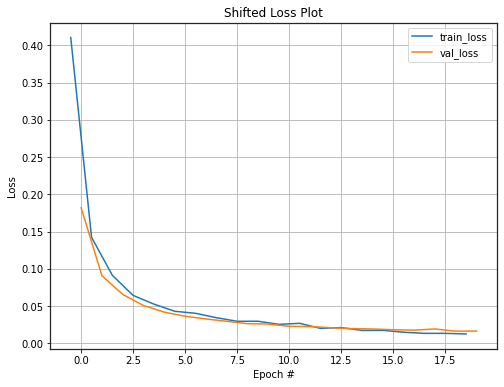

In [ ]:
fig , ax3 = plt.subplots(figsize = (8 , 6))
ax3.plot(shifted_epoch , r.history["loss"] , label = "train_loss")
ax3.plot(epochs, r.history["val_loss"] , label = "val_loss")
ax3.set_title("Shifted Loss Plot")  
ax3.set_xlabel("Epoch #")
ax3.set_ylabel("Loss")
ax3.grid(True)
ax3.legend()
plt.show()

As we can see, after shifting the training loss, the gap between the validation and training loss las been decreased. 

In [ ]:
# model.save("/content/drive/My Drive/Datasets/mask-data/mask-detection.model")

In [ ]:
# from google.colab import files
# files.download("/content/drive/My Drive/Datasets")

In [ ]:
predict = model.predict(X_test , batch_size = BS).argmax(axis = 1)

In [ ]:
print(classification_report(y_test.argmax(axis = 1) , predict , target_names = lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      1.00      0.99       208
without_mask       1.00      0.99      0.99       300

    accuracy                           0.99       508
   macro avg       0.99      0.99      0.99       508
weighted avg       0.99      0.99      0.99       508



In [ ]:
cm = confusion_matrix(y_test.argmax(axis = 1) , predict)

In [ ]:
import itertools
def plot_confusion_matrix(cm , classes , title = "Confusion Matrix" , figsize = (5 ,5) , cmap = plt.cm.Blues):
  
  print(cm)
  
  fig , ax = plt.subplots(figsize = figsize)
  im = ax.imshow(cm ,  interpolation = "nearest" , cmap = cmap)
  ax.set_title(title)
  fig.colorbar(im)
  tick_marks = np.arange(len(classes))
  ax.set_xticks(tick_marks)
  ax.set_yticks(tick_marks)

  thresh = cm.max() / 2
  for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
    plt.text(j , i , format(cm[i , j] , "d") , horizontalalignment = "center", 
              color = "white" if cm[i , j] > thresh else "black")
          
  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  ax.set_xticklabels(label_dict.values())
  ax.set_yticklabels(label_dict.values()) 
  plt.grid(False)
  plt.show()

[[207   1]
 [  2 298]]


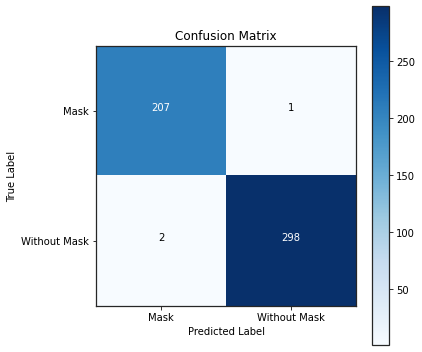

In [ ]:
plot_confusion_matrix(cm , classes = list(range(2)))

As we can see from the above confusion matrix, we can see that this model predicted most of the samples correctly and we have 1 or 2 `False Positive`(The Model Predicted `Mask` but the true label is `Without Mask`) and `False Negative` (The Model Predicted `Without Mask` but the true label is `With Mask`)

In [ ]:
predict

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,

In [ ]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

*As we can see, the testing label is `N x 2` array which is not appropriate for us. This is because our prediction is `N x 1` array and our testing labels must be the same size.

In [ ]:
y_testFlattened = []
for i in range(len(y_test)):
  y_testFlattened.append(y_test[i][1]) 
y_testFlattened = np.array(y_testFlattened , dtype = "int")

In [ ]:
y_testFlattened

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,

In [ ]:
label_dict = {0 : "Mask" , 1 : "Without Mask"}

In [ ]:
def plotClassified(X_test , predict , y_test , figsize = (15 , 15) , wspace = 0.1  , hspace = 0.3):
  plt.rcParams["axes.grid"] = True
  plt.rcParams["axes.edgecolor"] = "0.15"                 # selecting edge/border color for each image
  plt.rcParams["axes.linewidth"]  = 1.25                  # assining a edge/border width for each image

  fig , axes = plt.subplots(3 , 1 , figsize = figsize)
  plt.subplots_adjust(wspace = wspace , hspace = hspace)        # determining the width gap and height gap between each subplots

  axes = axes.flatten()                                   # for using axes indeces with one dimention array instead of two dimension

  for i in range(0 , 3):
    classified_idx = np.where(predict == y_test)[0]    # representing misclassified images
    n = np.random.choice(classified_idx)
    img = np.reshape(X_test[n], (224 , 224 , 3))                # converting a 1-D array into 2-D 224x224 array
    axes[i].imshow(img)
    axes[i].title.set_text("True label : {} , predicted : {}".format(label_dict[y_testFlattened[n]] , label_dict[predict[n]]))
    axes[i].tick_params(labelbottom = False , labelleft = False)    # removing labels/ticks along x axis and y axis
    axes[i].grid(False)

In [ ]:
def plotMisclassified(X_test , predict , y_test , figsize = (15 , 15) , wspace = 0.1  , hspace = 0.3):
  
  
  try:
    plt.rcParams["axes.grid"] = True
    plt.rcParams["axes.edgecolor"] = "0.15"                 # selecting edge/border color for each image
    plt.rcParams["axes.linewidth"]  = 1.25                  # assining a edge/border width for each image

    fig , axes = plt.subplots(3 , 1 , figsize = figsize)
    plt.subplots_adjust(wspace = wspace , hspace = hspace)        # determining the width gap and height gap between each subplots

    axes = axes.flatten()                                   # for using axes indeces with one dimention array instead of two dimension

    for i in range(0 , 3):
      classified_idx = np.where(predict != y_test)[0]    # representing misclassified images
      n = np.random.choice(classified_idx)
      img = np.reshape(X_test[n], (224 , 224 , 3))                # converting a 1-D array into 2-D 224x224 array
      axes[i].imshow(img)
      axes[i].title.set_text("True label : {} , predicted : {}".format(label_dict[y_testFlattened[n]] , label_dict[predict[n]]))
      axes[i].tick_params(labelbottom = False , labelleft = False)    # removing labels/ticks along x axis and y axis
      axes[i].grid(False)
  except:
    print("There is nothing to plot here...")  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


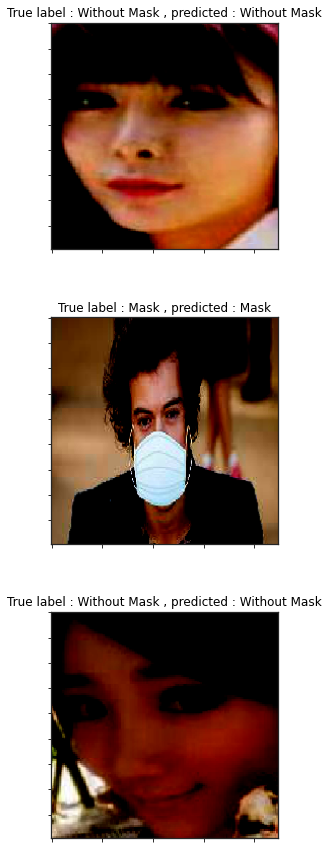

In [ ]:
plotClassified(X_test , predict , y_testFlattened)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


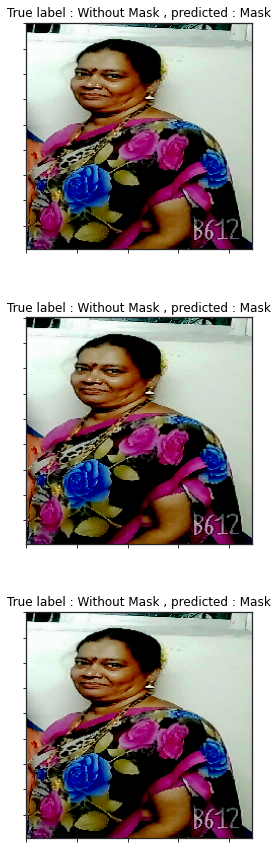

In [ ]:
plotMisclassified(X_test , predict , y_testFlattened)